In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("./datasets/stores_data.csv")

In [3]:
df.sample(5)

,Store Number,AreaStore,Property,Type,Old/New,Checkout Number,Revenue
13,14,432.0,Rental,Express,Old,2.0,"6,725,500"
95,96,406.0,Rental,Express,New,2.0,"13,350,000"
117,118,420.0,Cooperate,Express,Old,3.0,"10,643,000"
79,80,562.0,Rental,Express,New,3.0,"24,214,000"
9,10,2700.0,Rental/Cooperate,Hyper,New,4.0,"13,405,500"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store Number     118 non-null    int64  
 1   AreaStore        118 non-null    float64
 2   Property         118 non-null    object 
 3   Type             118 non-null    object 
 4   Old/New          118 non-null    object 
 5   Checkout Number  106 non-null    float64
 6   Revenue          118 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.6+ KB


In [5]:
df['Revenue'] = df['Revenue'].apply(lambda x : int(x.replace(",","")))

<Axes: >

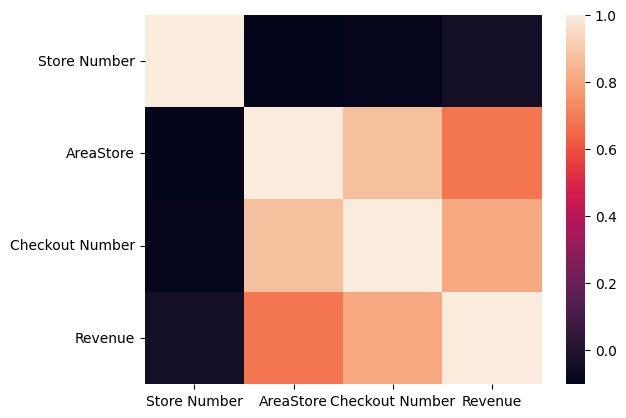

In [6]:
sns.heatmap(df[['Store Number', 'AreaStore', 'Checkout Number', 'Revenue']].corr())

In [94]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler
std_scaler = StandardScaler()
transformer = FunctionTransformer(func=np.log1p)
scaler = MinMaxScaler()

In [8]:
from sklearn.model_selection import train_test_split
X = df[['AreaStore']].values
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
# scores = []
# for i in range(X_train.shape[1]):
#     scores.append(variance_inflation_factor(X_train, i))

In [11]:
from sklearn.linear_model import LinearRegression

In [111]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", LinearRegression())
])

lr = pipe

In [112]:
lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [113]:
y_pred = lr.predict(X_test)
residue = y_test - y_pred

<Axes: ylabel='Density'>

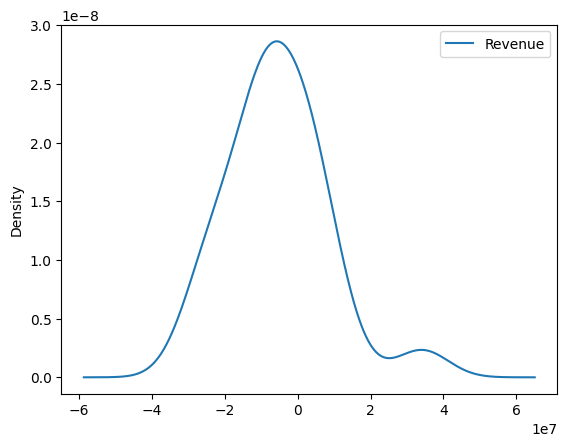

In [109]:
# hist and kde of residue

# 1.Normal Residue
pd.DataFrame(residue).plot(kind='kde')

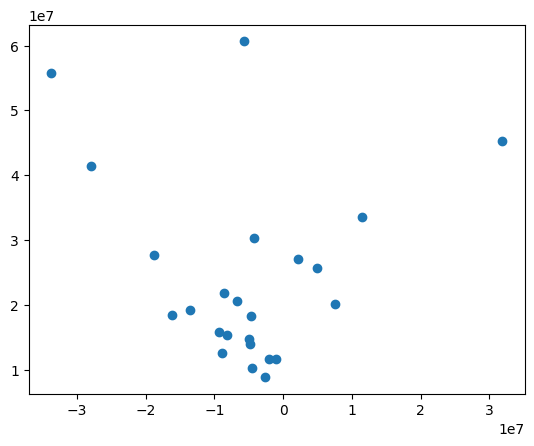

In [99]:
# Homoscedasticity
# residue vs y_pred
plt.scatter(residue, y_pred)

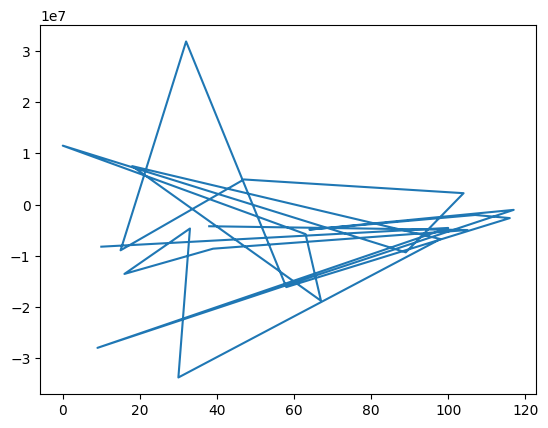

In [100]:
# auto correlation
plt.plot(residue)

In [114]:
r2_score(y_test, y_pred)

0.4149663178062343

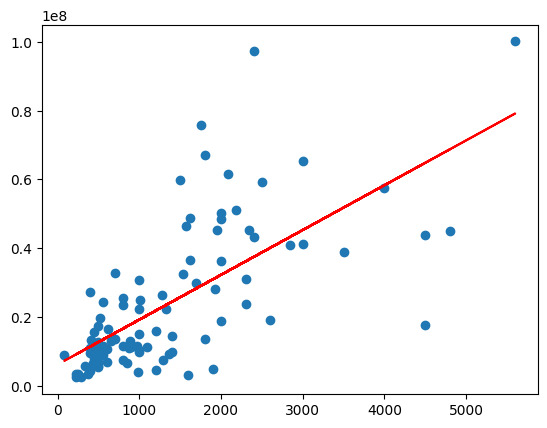

In [115]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), c='red')

<Axes: ylabel='Density'>

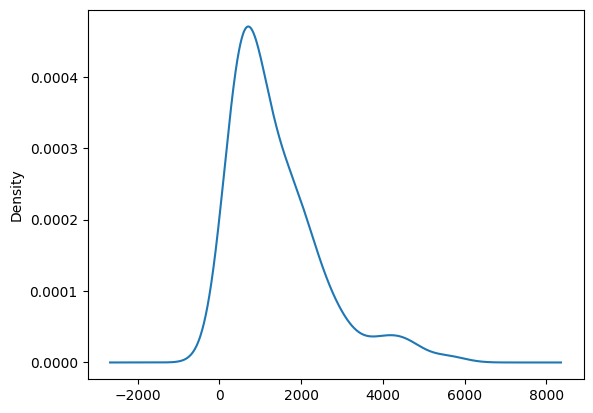

In [116]:
df['AreaStore'].plot(kind='kde')

<Axes: ylabel='Count'>

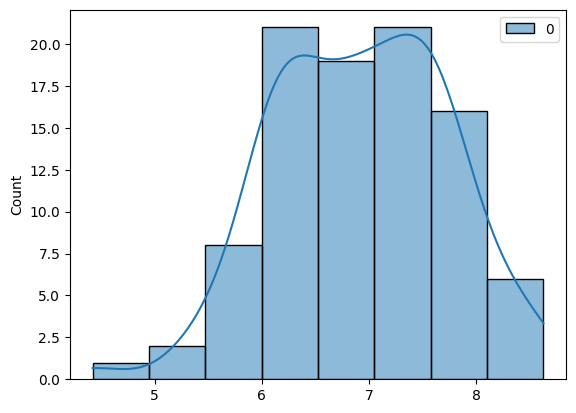

In [117]:
sns.histplot(transformer.fit_transform(X_train), kde=True)